IntSlider(value=10, continuous_update=False, description='Modul:', max=200, min=3)

IntSlider(value=3, continuous_update=False, description='Faktor:', max=50, min=1)

Output()

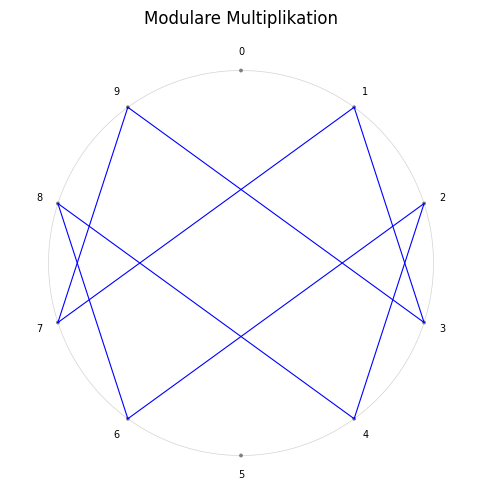

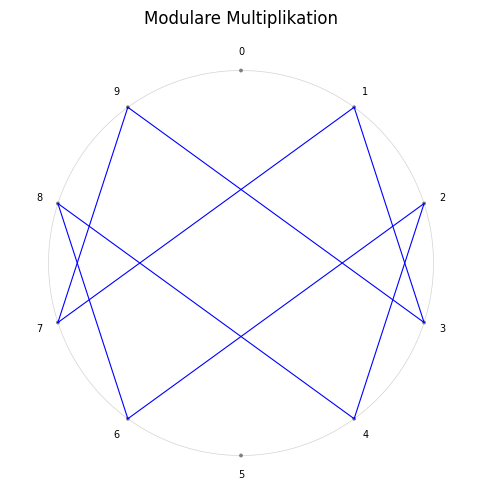

In [2]:
# Komplettes, einfaches Programm — fig und ax sind globale Variablen, keine Farben, kein VBox

%matplotlib inline
import sys
sys.path.append("../code")  # Projektkonvention
from IPython.display import display, HTML
display(HTML('<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.6.2/dist/css/bootstrap.min.css">'))

from math import pi, cos, sin
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, interactive_output

# ---- Einfache Standardwerte ----
modul = 10
faktor = 3

# ---- Globale Figure/Achse einmalig erzeugen ----
try:
    fig, ax
except NameError:
    plt.close('all')
    fig, ax = plt.subplots(figsize=(6, 6))

# ---- Hilfsfunktionen (verwenden globales ax) ----
def feld_position(nummer, modul_val):
    """Koordinaten: Nummer 0 oben, dann im Uhrzeigersinn."""
    phi = pi/2 - 2 * pi * nummer / modul_val
    x = cos(phi)
    y = sin(phi)
    return x, y

def initialisieren():
    """Bereitet die globale Achse vor und zeichnet den äußeren Kreis."""
    ax.clear()
    ax.axis('off')
    ax.set_title("Modulare Multiplikation", fontsize=12)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    kreis = plt.Circle((0, 0), 1, color='lightgray', fill=False, linewidth=0.5)
    ax.add_patch(kreis)

def zeichne_kreis(x, y, radius=0.01, farbe='gray', nummer=-1):
    """Bestehende Funktion: zeichnet einen kleinen Kreis auf globaler Achse."""
    kreis = plt.Circle((x, y), radius, color=farbe, fill=True, linewidth=0)
    ax.add_patch(kreis)
    if nummer >= 0:
        ax.text(1.1 * x, 1.1 * y, str(nummer), ha='center', va='center', fontsize=7)

def zeichne_zahlenkreis(modul_val):
    """Zeichnet alle Felder des Zahlenkreises (verwendet zeichne_kreis)."""
    for i in range(modul_val):
        x, y = feld_position(i, modul_val)
        nummer = i if modul_val <= 50 else -1
        zeichne_kreis(x, y, nummer=nummer)

def zeichne_linien(modul_val, faktor_val, linewidth=0.8):
    """Zeichnet alle Verbindungen i -> (i*faktor) % modul auf globaler Achse."""
    for i in range(modul_val):
        x, y = feld_position(i, modul_val)
        j = (i * faktor_val) % modul_val
        x2, y2 = feld_position(j, modul_val)
        ax.plot([x, x2], [y, y2], color='blue', linewidth=linewidth)

# ---- Update-Funktion für Widgets (arbeitet mit globalen fig/ax) ----
def update_plot(modul_val, faktor_val):
    initialisieren()
    zeichne_zahlenkreis(modul_val)
    zeichne_linien(modul_val, faktor_val)
    display(fig)

# ---- Widgets (einfach) ----
slider_modul = IntSlider(value=modul, min=3, max=200, step=1, description='Modul:', continuous_update=False)
slider_faktor = IntSlider(value=faktor, min=1, max=50, step=1, description='Faktor:', continuous_update=False)

out = interactive_output(update_plot, {'modul_val': slider_modul, 'faktor_val': slider_faktor})

# Direkt anzeigen (kein VBox)
display(slider_modul, slider_faktor, out)

# ---- Erstes Zeichnen ----
initialisieren()
zeichne_zahlenkreis(modul)
zeichne_linien(modul, faktor)
display(fig)

In [ ]:
# Komplettes, einfaches Programm — fig und ax sind globale Variablen, keine Farben, kein VBox

%matplotlib inline
import sys
sys.path.append("../code")  # Projektkonvention
from IPython.display import display, HTML
display(HTML('<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.6.2/dist/css/bootstrap.min.css">'))

from math import pi, cos, sin
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, interactive_output

# ---- Einfache Standardwerte ----
modul = 10
faktor = 3

# ---- Globale Figure/Achse einmalig erzeugen ----
try:
    fig, ax
except NameError:
    plt.close('all')
    fig, ax = plt.subplots(figsize=(6, 6))

# ---- Hilfsfunktionen (verwenden globales ax) ----
def feld_position(nummer, modul_val):
    """Koordinaten: Nummer 0 oben, dann im Uhrzeigersinn."""
    phi = pi/2 - 2 * pi * nummer / modul_val
    x = cos(phi)
    y = sin(phi)
    return x, y

def initialisieren():
    """Bereitet die globale Achse vor und zeichnet den äußeren Kreis."""
    ax.clear()
    ax.axis('off')
    ax.set_title("Modulare Multiplikation", fontsize=12)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    kreis = plt.Circle((0, 0), 1, color='lightgray', fill=False, linewidth=0.5)
    ax.add_patch(kreis)

def zeichne_kreis(x, y, radius=0.01, farbe='gray', nummer=-1):
    """Bestehende Funktion: zeichnet einen kleinen Kreis auf globaler Achse."""
    kreis = plt.Circle((x, y), radius, color=farbe, fill=True, linewidth=0)
    ax.add_patch(kreis)
    if nummer >= 0:
        ax.text(1.1 * x, 1.1 * y, str(nummer), ha='center', va='center', fontsize=7)

def zeichne_zahlenkreis(modul_val):
    """Zeichnet alle Felder des Zahlenkreises (verwendet zeichne_kreis)."""
    for i in range(modul_val):
        x, y = feld_position(i, modul_val)
        nummer = i if modul_val <= 50 else -1
        zeichne_kreis(x, y, nummer=nummer)

def zeichne_linien(modul_val, faktor_val, linewidth=0.8):
    """Zeichnet alle Verbindungen i -> (i*faktor) % modul auf globaler Achse."""
    for i in range(modul_val):
        x, y = feld_position(i, modul_val)
        j = (i * faktor_val) % modul_val
        x2, y2 = feld_position(j, modul_val)
        ax.plot([x, x2], [y, y2], color='blue', linewidth=linewidth)

# ---- Update-Funktion für Widgets (arbeitet mit globalen fig/ax) ----
def update_plot(modul_val, faktor_val):
    initialisieren()
    zeichne_zahlenkreis(modul_val)
    zeichne_linien(modul_val, faktor_val)
    display(fig)

# ---- Widgets (einfach) ----
slider_modul = IntSlider(value=modul, min=3, max=200, step=1, description='Modul:', continuous_update=False)
slider_faktor = IntSlider(value=faktor, min=1, max=50, step=1, description='Faktor:', continuous_update=False)

out = interactive_output(update_plot, {'modul_val': slider_modul, 'faktor_val': slider_faktor})

# Direkt anzeigen (kein VBox)
display(slider_modul, slider_faktor, out)

# ---- Erstes Zeichnen ----
initialisieren()
zeichne_zahlenkreis(modul)
zeichne_linien(modul, faktor)
display(fig)

## AB: Modulare Multiplikation
**Ziel:**  
Du programmierst eine interaktive Visualisierung der modularen Multiplikation. Dabei lernst du, wie Zahlen im Kreis verbunden werden und wie Zyklen entstehen. Das Programm wird Schritt für Schritt aufgebaut!

In [1]:
# Nur Ausführen, nichts ändern!
%matplotlib inline
import sys
sys.path.append("../code")  # Damit Python im richtigen Ordner sucht
if 'pyodide' in sys.modules:
    import piplite
    await piplite.install(['ipywidgets'])
from ipywidgets import IntSlider, interactive_output, VBox

from IPython.display import display, HTML
display(HTML('<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.6.2/dist/css/bootstrap.min.css">'))
from math import pi, cos, sin  # Nur die genutzten Funktionen
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Für zyklusfarben()

### **Aufgabe | Multiplikation modulo m** 
a) Das Programm in der folgenden Codezelle erzeugt eine Zeichenfläche mit einem Kreis. Anschließend wird ein kleiner Kreis mit der Nummer 2 eingezeichnet. Auf dem großen Kreis soll der ganze Zahlenkreis modulo m dargestellt werden. Ergänze dazu die Funktion feld_position(nummer), so dass diese die Koordinaten des ensprechenden Feldes zurückliefert und schreibe dann eine Funktion, die alle diese Kreise zeichnet.
<br>  

b) Erstelle einen Schieberegler, mit dem man den Modul m einstellen kann. Füge hierzu folgende Funktion hinzu: 

<span style="font-size:12px;font-family:monospace">
def schieberegler_modul():  <br>
&nbsp;&nbsp;&nbsp;sl_modul = widgets.IntSlider(value=3, min=3, max=400, step=1, description='Modul:', continuous_update=False)  

&nbsp;&nbsp;&nbsp;def aktion_modul(change):  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;global modul  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;modul = sl_modul.value  


&nbsp;&nbsp;&nbsp;display(sl_modul)  
&nbsp;&nbsp;&nbsp;sl_modul.observe(aktion, names='value')  
</span>

<div style="font-size:16px; font-family:sans-serif; margin-top:8px;"> Die Funktion aktion(change) wird jedes Mal aufgerufen, wenn sich die Einstellung des Schiebereglers ändert. Passe diese Funktion so an, dass jeweils der Kreis zum eingestellten Modul gezeichnet wird.
<br>   

 
c) Die Variable k stehe für die Nummer eines der Felder im Zahlenkreis. Erstelle eine Funktion, welche das Feld k mit dem Feld (k*faktor) mod modul miteinander verbindet. Verwende folgende Funktion zum zeichnen von Linien <\div>
<br>  
<span style="font-size:12px;font-family:monospace">
def zeichne_linie(von_x, von_y, nach_x, nach_y, farbe=(0,0,1), linewidth=1):  <br>
&nbsp;&nbsp;&nbsp; ax.plot([von_x, von_y], [nach_x, nach_y], color=farbe, linewidth=linewidth)  
</span> 
<br>
<div style="font-size:16px; font-family:sans-serif; margin-top:8px;"> 

d) Schreibe nun eine Funktion, die alle Felder von 1 bis m-1 durchläuft und diese jeweils mit dem Feld verbindet, auf das man durch Multiplikation mit dem Wert der Variablen Faktor gelangt. 

e) Ergänze nun um einen Schieberegler, mit dem man den Wert des Faktors einstellen kann.




### **Zusatzaufgabe 1| Zeichnen der Figur animieren**
Animiere die Zeichnung der Linien, damit man die Enstehung der Figur nachvollziehen kann. Unten sieht du ein Beispielprogramm für eine Animation.


In [ ]:
import time
from IPython.display import clear_output, display
def initialisieren():
    """
    Initialisiert die Zeichenfläche einschließlich eines Kreises mit Radius 1.
    """
    ax.clear()
    #Achsen ausblenden 
    ax.axis('off')
    ax.set_title("Modulare Multiplikation", fontsize=12)  # Titel setzen
    ax.set_aspect('equal', 'box')  # Gleiche Skalierung auf beiden Achsen
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    kreis = plt.Circle((0, 0), 1, color='lightgray', fill=False, linewidth=0.5)
    ax.add_artist(kreis)
    
def animiere_linie(start, ende, schritte=10, farbe='red', linewidth=2):
    x0, y0 = start
    x1, y1 = ende
    for i in range(1, schritte + 1):
        # Interpolierte Endposition
        xt = x0 + (x1 - x0) * i / schritte
        yt = y0 + (y1 - y0) * i / schritte
        ax.plot([x0, xt], [y0, yt], color=farbe, linewidth=linewidth)
        clear_output(wait=True)
        display(fig)
        time.sleep(0.01)  # Geschwindigkeit der Animation

#Hauptprogramm
plt.close('all')  # Alle alten Figuren schließen
fig, ax = plt.subplots(figsize=(6, 6))#Zeichenfläche erstellen
initialisieren()
plt.show()#Zeichenfläche anzeigen
animiere_linie((0, 0), (1, 1), schritte=100)

### **Zusatzaufgabe 2| Zyklen kennzeichnen**
Die Figuren zerfallen oftmals in mehrere "Zyklen", ihre Anzahl ist gleich dem ggT(modul, faktor). Stelle die Zyklen in verschiedenen Farben dar. Hinweis:Merke dir dazu zu den bereits besuchten Zellen die gewählte Farbe des zugehörigen Zyklus. 